!pip install numpy
!pip install scipy
!pip install tensorflow
!pip install keras
!pip install tensorflow-macos
!pip install tensorflow-metal
!pip install scikit-learn

In [1]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Found 28709 images belonging to 7 classes.
Epoch 1/50


2023-10-12 18:09:00.047367: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-12 18:09:00.047394: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-12 18:09:00.047404: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-12 18:09:00.047436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-12 18:09:00.047448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - ETA: 0s - loss: 1.9431 - accuracy: 0.1250

2023-10-12 18:09:00.414216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 502ms/step - loss: 1.9431 - accuracy: 0.1250 - val_loss: 1.9372 - val_accuracy: 0.0938
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 1.9246 - accuracy: 0.2188 - val_loss: 1.9228 - val_accuracy: 0.0938
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 1.9047 - accuracy: 0.1875 - val_loss: 1.9094 - val_accuracy: 0.1562
Epoch 4/50
1/1 [==============================] - 0s 46ms/step - loss: 1.9003 - accuracy: 0.1250 - val_loss: 1.8963 - val_accuracy: 0.0938
Epoch 5/50
1/1 [==============================] - 0s 46ms/step - loss: 1.8899 - accuracy: 0.1562 - val_loss: 1.8834 - val_accuracy: 0.0938
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 1.8580 - accuracy: 0.3750 - val_loss: 1.8710 - val_accuracy: 0.0938
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 1.8530 - accuracy: 0.3438 - val_loss: 1.8589 - val_accuracy: 0.1250
Epoch 8/50
1/1 [=====================

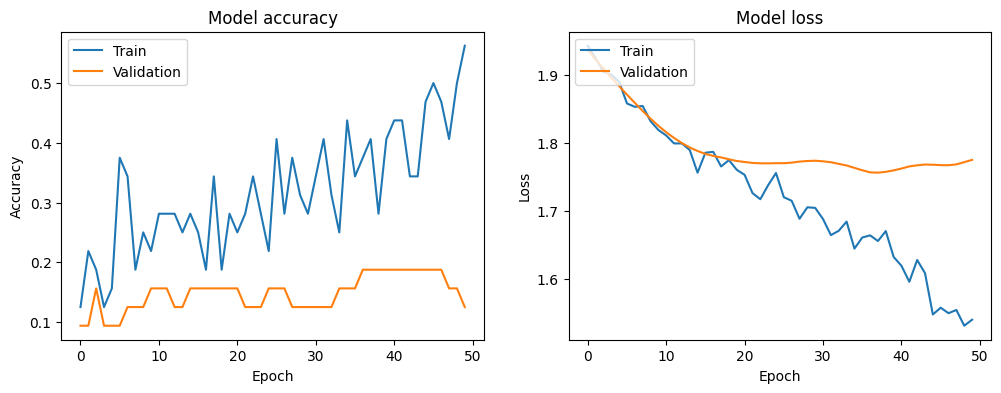

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 32
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_32.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
2/2 [==============================] - 0s 133ms/step - loss: 1.9315 - accuracy: 0.1719 - val_loss: 1.9146 - val_accuracy: 0.2812
Epoch 2/50
2/2 [==============================] - 0s 47ms/step - loss: 1.8893 - accuracy: 0.2969 - val_loss: 1.8945 - val_accuracy: 0.2812
Epoch 3/50
2/2 [==============================] - 0s 48ms/step - loss: 1.8531 - accuracy: 0.2969 - val_loss: 1.8783 - val_accuracy: 0.2812
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 1.8189 - accuracy: 0.2969 - val_loss: 1.8677 - val_accuracy: 0.2812
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 1.7968 - accuracy: 0.2969 - val_loss: 1.8663 - val_accuracy: 0.2812
Epoch 6/50
2/2 [==============================] - 0s 50ms/step - loss: 1.7799 - accuracy: 0.2969 - val_loss: 1.8735 - val_accuracy: 0.2812
Epoch 7/50
2/2 [==============================] - 0s 46ms/step - loss: 1.7766 - accuracy: 0.2969 - val_loss: 1.8834 - val_

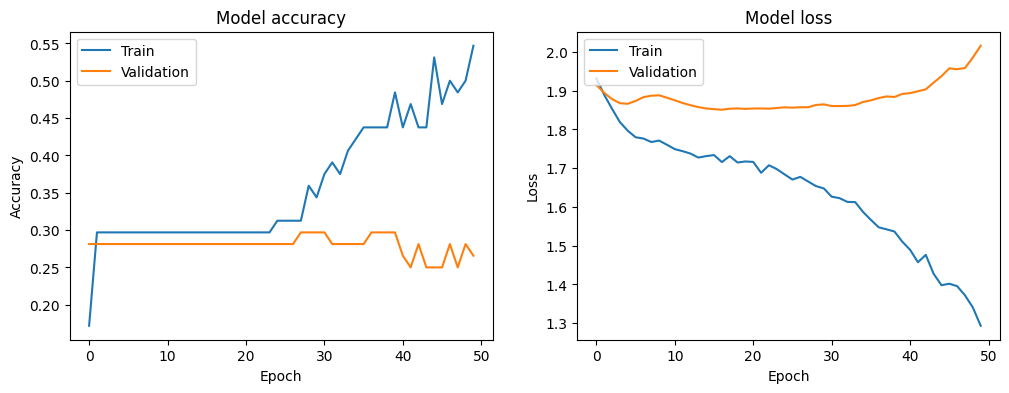

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 64
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_64.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
4/4 [==============================] - 0s 64ms/step - loss: 1.9141 - accuracy: 0.2344 - val_loss: 1.8647 - val_accuracy: 0.2734
Epoch 2/50
4/4 [==============================] - 0s 32ms/step - loss: 1.8332 - accuracy: 0.2891 - val_loss: 1.8207 - val_accuracy: 0.2734
Epoch 3/50
4/4 [==============================] - 0s 33ms/step - loss: 1.7989 - accuracy: 0.2891 - val_loss: 1.8119 - val_accuracy: 0.2734
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 1.7903 - accuracy: 0.2891 - val_loss: 1.7990 - val_accuracy: 0.2734
Epoch 5/50
4/4 [==============================] - 0s 30ms/step - loss: 1.7545 - accuracy: 0.2891 - val_loss: 1.7939 - val_accuracy: 0.2734
Epoch 6/50
4/4 [==============================] - 0s 32ms/step - loss: 1.7557 - accuracy: 0.2891 - val_loss: 1.7897 - val_accuracy: 0.2734
Epoch 7/50
4/4 [==============================] - 0s 30ms/step - loss: 1.7468 - accuracy: 0.2891 - val_loss: 1.7883 - val_a

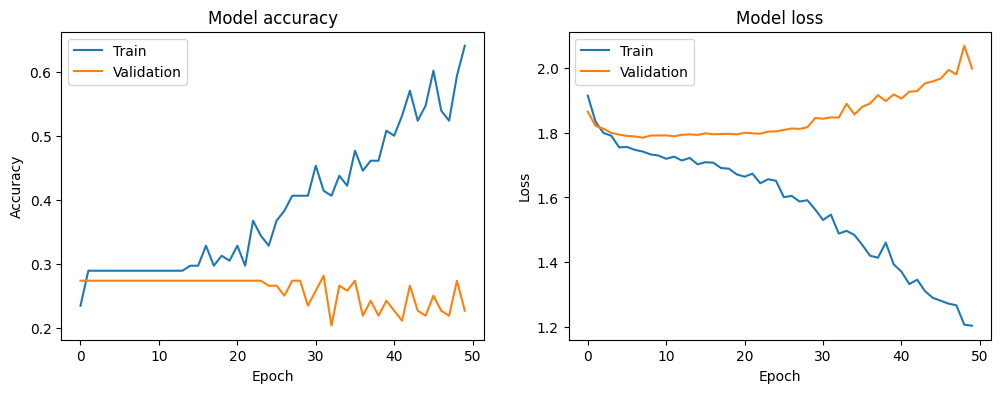

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 128
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_128.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 1.9284 - accuracy: 0.1680 - val_loss: 1.8956 - val_accuracy: 0.1641
Epoch 2/50
8/8 [==============================] - 0s 26ms/step - loss: 1.8647 - accuracy: 0.2031 - val_loss: 1.8689 - val_accuracy: 0.1602
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 1.8190 - accuracy: 0.2148 - val_loss: 1.8697 - val_accuracy: 0.2227
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 1.8079 - accuracy: 0.2031 - val_loss: 1.8681 - val_accuracy: 0.2656
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 1.7957 - accuracy: 0.2188 - val_loss: 1.8606 - val_accuracy: 0.2656
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 1.7945 - accuracy: 0.1992 - val_loss: 1.8634 - val_accuracy: 0.1641
Epoch 7/50
8/8 [==============================] - 0s 27ms/step - loss: 1.7927 - accuracy: 0.2305 - val_loss: 1.8610 - val_a

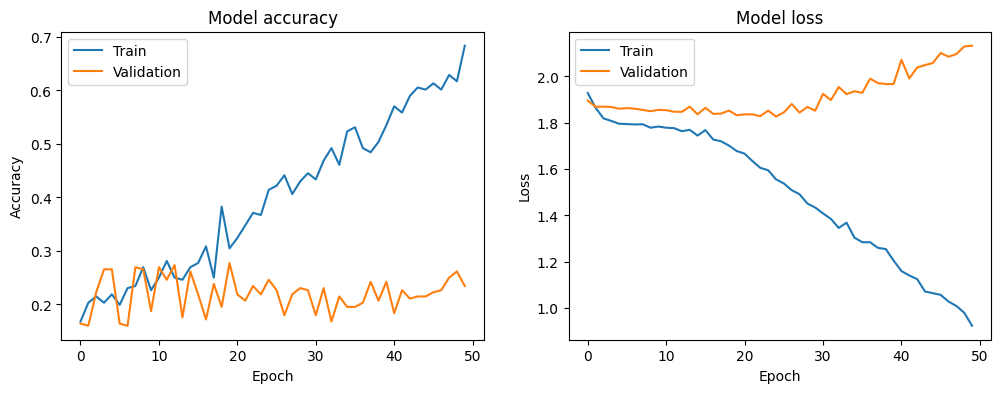

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 256
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_256.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
16/16 [==============================] - 1s 31ms/step - loss: 1.8961 - accuracy: 0.2207 - val_loss: 1.8502 - val_accuracy: 0.2500
Epoch 2/50
16/16 [==============================] - 0s 25ms/step - loss: 1.8292 - accuracy: 0.2266 - val_loss: 1.8452 - val_accuracy: 0.2500
Epoch 3/50
16/16 [==============================] - 0s 25ms/step - loss: 1.8108 - accuracy: 0.2285 - val_loss: 1.8393 - val_accuracy: 0.2559
Epoch 4/50
16/16 [==============================] - 0s 25ms/step - loss: 1.8066 - accuracy: 0.2383 - val_loss: 1.8305 - val_accuracy: 0.2500
Epoch 5/50
16/16 [==============================] - 0s 25ms/step - loss: 1.8006 - accuracy: 0.2363 - val_loss: 1.8355 - val_accuracy: 0.2500
Epoch 6/50
16/16 [==============================] - 0s 25ms/step - loss: 1.7992 - accuracy: 0.2324 - val_loss: 1.8306 - val_accuracy: 0.2461
Epoch 7/50
16/16 [==============================] - 0s 25ms/step - loss: 1.8012 - accuracy: 0.2305 - val_loss: 

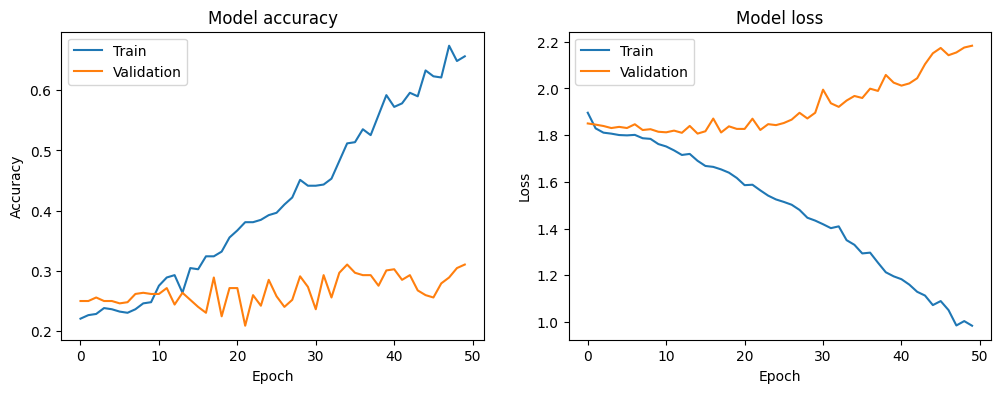

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 512
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_512.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
32/32 [==============================] - 1s 27ms/step - loss: 1.8645 - accuracy: 0.2461 - val_loss: 1.8396 - val_accuracy: 0.2480
Epoch 2/50
32/32 [==============================] - 1s 24ms/step - loss: 1.8398 - accuracy: 0.2480 - val_loss: 1.8296 - val_accuracy: 0.2422
Epoch 3/50
32/32 [==============================] - 1s 24ms/step - loss: 1.8378 - accuracy: 0.2529 - val_loss: 1.8259 - val_accuracy: 0.2422
Epoch 4/50
32/32 [==============================] - 1s 24ms/step - loss: 1.8300 - accuracy: 0.2529 - val_loss: 1.8234 - val_accuracy: 0.2422
Epoch 5/50
32/32 [==============================] - 1s 24ms/step - loss: 1.8262 - accuracy: 0.2578 - val_loss: 1.8149 - val_accuracy: 0.2432
Epoch 6/50
32/32 [==============================] - 1s 24ms/step - loss: 1.8124 - accuracy: 0.2676 - val_loss: 1.8113 - val_accuracy: 0.2422
Epoch 7/50
32/32 [==============================] - 1s 24ms/step - loss: 1.7976 - accuracy: 0.2666 - val_loss: 

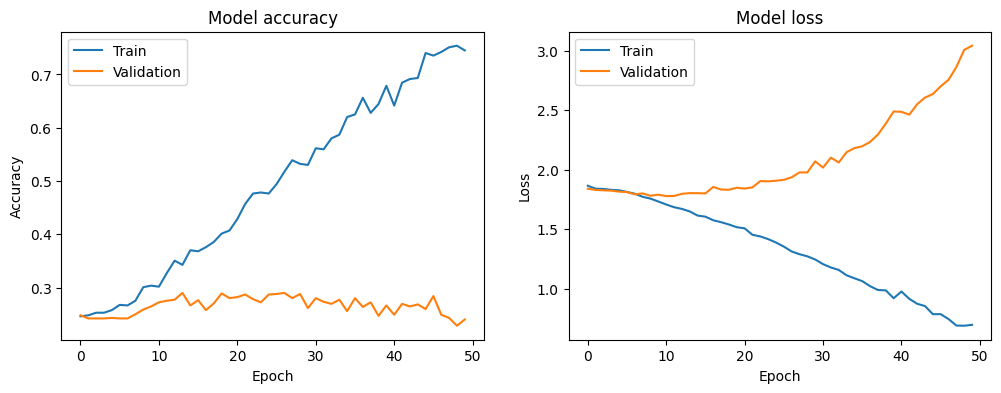

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 1024
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_1024.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
64/64 [==============================] - 2s 30ms/step - loss: 1.8463 - accuracy: 0.2427 - val_loss: 1.8256 - val_accuracy: 0.2451
Epoch 2/50
64/64 [==============================] - 2s 24ms/step - loss: 1.8230 - accuracy: 0.2456 - val_loss: 1.8190 - val_accuracy: 0.2451
Epoch 3/50
64/64 [==============================] - 2s 24ms/step - loss: 1.8124 - accuracy: 0.2505 - val_loss: 1.8156 - val_accuracy: 0.2549
Epoch 4/50
64/64 [==============================] - 2s 24ms/step - loss: 1.8037 - accuracy: 0.2500 - val_loss: 1.8061 - val_accuracy: 0.2437
Epoch 5/50
64/64 [==============================] - 2s 24ms/step - loss: 1.7911 - accuracy: 0.2510 - val_loss: 1.8029 - val_accuracy: 0.2476
Epoch 6/50
64/64 [==============================] - 2s 24ms/step - loss: 1.7705 - accuracy: 0.2769 - val_loss: 1.7831 - val_accuracy: 0.2646
Epoch 7/50
64/64 [==============================] - 2s 24ms/step - loss: 1.7492 - accuracy: 0.2773 - val_loss: 

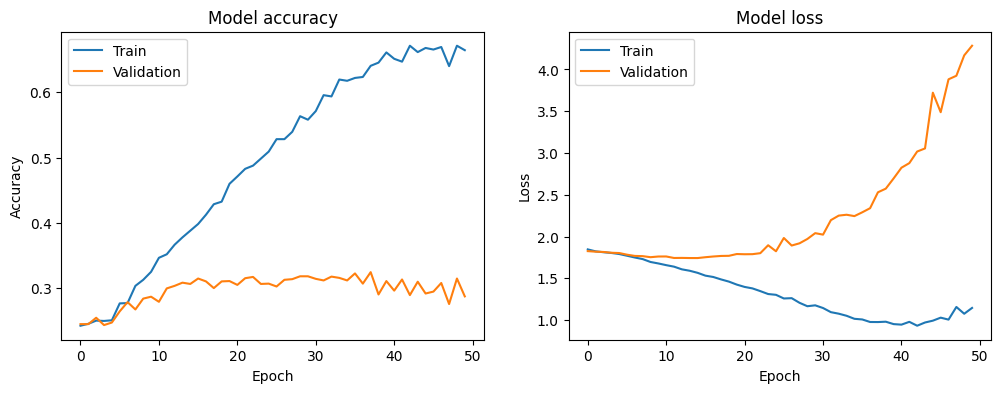

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 2048
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_2048.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
128/128 [==============================] - 4s 27ms/step - loss: 1.8439 - accuracy: 0.2393 - val_loss: 1.8253 - val_accuracy: 0.2563
Epoch 2/50
128/128 [==============================] - 3s 26ms/step - loss: 1.8231 - accuracy: 0.2471 - val_loss: 1.7929 - val_accuracy: 0.2510
Epoch 3/50
128/128 [==============================] - 3s 27ms/step - loss: 1.7965 - accuracy: 0.2583 - val_loss: 1.7719 - val_accuracy: 0.2598
Epoch 4/50
128/128 [==============================] - 3s 25ms/step - loss: 1.7723 - accuracy: 0.2869 - val_loss: 1.7541 - val_accuracy: 0.2874
Epoch 5/50
128/128 [==============================] - 3s 25ms/step - loss: 1.7488 - accuracy: 0.2908 - val_loss: 1.7500 - val_accuracy: 0.2971
Epoch 6/50
128/128 [==============================] - 3s 25ms/step - loss: 1.7234 - accuracy: 0.3091 - val_loss: 1.7219 - val_accuracy: 0.3093
Epoch 7/50
128/128 [==============================] - 3s 25ms/step - loss: 1.6961 - accuracy: 0.331

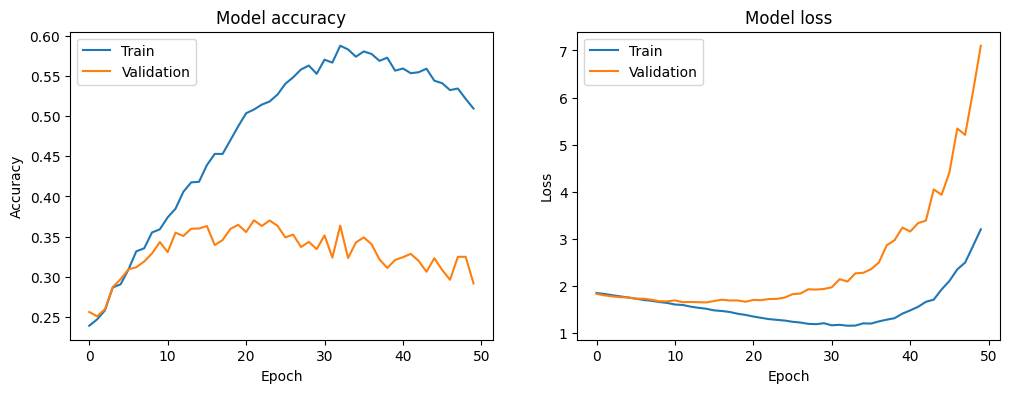

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_4096.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 7s 26ms/step - loss: 1.8171 - accuracy: 0.2556 - val_loss: 1.8006 - val_accuracy: 0.2622
Epoch 2/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7774 - accuracy: 0.2666 - val_loss: 1.7600 - val_accuracy: 0.2817
Epoch 3/50
256/256 [==============================] - 6s 24ms/step - loss: 1.7338 - accuracy: 0.3030 - val_loss: 1.7267 - val_accuracy: 0.3062
Epoch 4/50
256/256 [==============================] - 6s 25ms/step - loss: 1.6976 - accuracy: 0.3308 - val_loss: 1.7093 - val_accuracy: 0.3109
Epoch 5/50
256/256 [==============================] - 6s 24ms/step - loss: 1.6673 - accuracy: 0.3435 - val_loss: 1.6719 - val_accuracy: 0.3408
Epoch 6/50
256/256 [==============================] - 6s 25ms/step - loss: 1.6331 - accuracy: 0.3595 - val_loss: 1.6741 - val_accuracy: 0.3309
Epoch 7/50
256/256 [==============================] - 6s 24ms/step - loss: 1.6063 - accuracy: 0.369

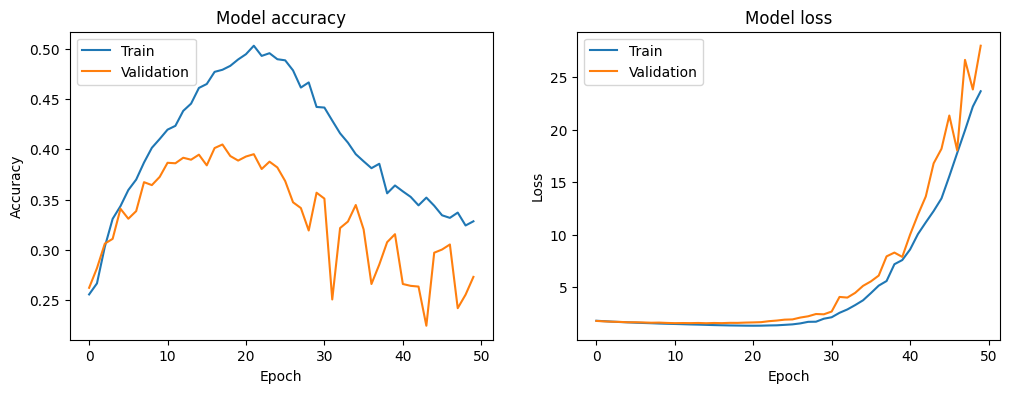

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_8192.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
512/512 [==============================] - 13s 25ms/step - loss: 1.8036 - accuracy: 0.2576 - val_loss: 1.7607 - val_accuracy: 0.2771
Epoch 2/50
512/512 [==============================] - 12s 23ms/step - loss: 1.7337 - accuracy: 0.2984 - val_loss: 1.7355 - val_accuracy: 0.2977
Epoch 3/50
512/512 [==============================] - 12s 23ms/step - loss: 1.6826 - accuracy: 0.3263 - val_loss: 1.6587 - val_accuracy: 0.3422
Epoch 4/50
512/512 [==============================] - 12s 23ms/step - loss: 1.6340 - accuracy: 0.3590 - val_loss: 1.6282 - val_accuracy: 0.3666
Epoch 5/50
512/512 [==============================] - 12s 23ms/step - loss: 1.5874 - accuracy: 0.3816 - val_loss: 1.5896 - val_accuracy: 0.3788
Epoch 6/50
512/512 [==============================] - 12s 23ms/step - loss: 1.5469 - accuracy: 0.4077 - val_loss: 1.5569 - val_accuracy: 0.3989
Epoch 7/50
512/512 [==============================] - 12s 23ms/step - loss: 1.5077 - accuracy

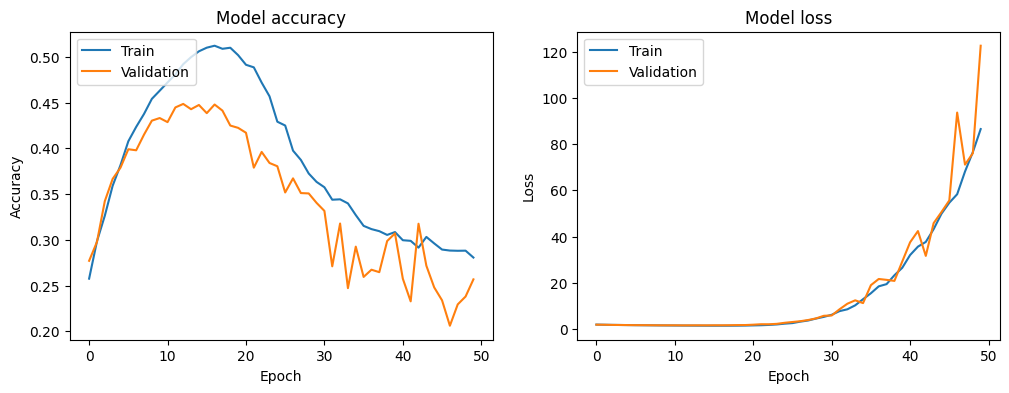

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 16384
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_16384.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
898/898 [==============================] - 26s 28ms/step - loss: 1.7769 - accuracy: 0.2721 - val_loss: 1.7138 - val_accuracy: 0.3064
Epoch 2/50
898/898 [==============================] - 24s 27ms/step - loss: 1.6817 - accuracy: 0.3307 - val_loss: 1.6306 - val_accuracy: 0.3518
Epoch 3/50
898/898 [==============================] - 25s 27ms/step - loss: 1.6080 - accuracy: 0.3684 - val_loss: 1.5736 - val_accuracy: 0.3820
Epoch 4/50
898/898 [==============================] - 25s 27ms/step - loss: 1.5443 - accuracy: 0.4040 - val_loss: 1.5416 - val_accuracy: 0.4090
Epoch 5/50
898/898 [==============================] - 25s 27ms/step - loss: 1.4926 - accuracy: 0.4277 - val_loss: 1.4888 - val_accuracy: 0.4237
Epoch 6/50
898/898 [==============================] - 25s 27ms/step - loss: 1.4447 - accuracy: 0.4536 - val_loss: 1.4406 - val_accuracy: 0.4536
Epoch 7/50
898/898 [==============================] - 25s 27ms/step - loss: 1.4067 - accuracy

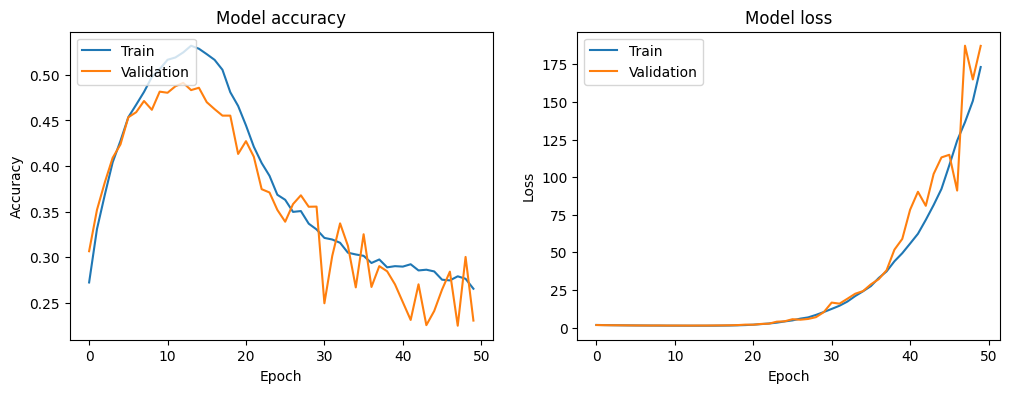

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 32768
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_32768.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
898/898 [==============================] - 26s 28ms/step - loss: 1.7785 - accuracy: 0.2712 - val_loss: 1.7191 - val_accuracy: 0.3075
Epoch 2/50
898/898 [==============================] - 25s 27ms/step - loss: 1.6835 - accuracy: 0.3322 - val_loss: 1.6531 - val_accuracy: 0.3437
Epoch 3/50
898/898 [==============================] - 25s 27ms/step - loss: 1.6113 - accuracy: 0.3701 - val_loss: 1.5818 - val_accuracy: 0.3870
Epoch 4/50
898/898 [==============================] - 25s 28ms/step - loss: 1.5520 - accuracy: 0.4025 - val_loss: 1.5379 - val_accuracy: 0.4067
Epoch 5/50
898/898 [==============================] - 25s 27ms/step - loss: 1.5001 - accuracy: 0.4239 - val_loss: 1.5134 - val_accuracy: 0.4168
Epoch 6/50
898/898 [==============================] - 24s 27ms/step - loss: 1.4538 - accuracy: 0.4438 - val_loss: 1.4781 - val_accuracy: 0.4331
Epoch 7/50
898/898 [==============================] - 25s 27ms/step - loss: 1.4184 - accuracy

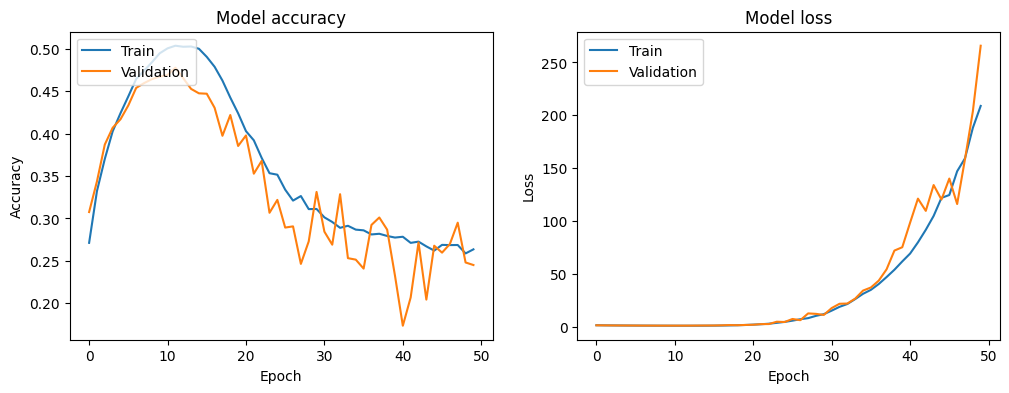

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 65536
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_batch_size_65536.keras')